<a href="https://colab.research.google.com/github/masa512/ece558/blob/main/set2_problem6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
import scipy.signal
import math

## Part A

In [122]:
def lin_conv_2d(h,N1,N2,Lx1,Lx2):
  # Pad H 
  hpad = np.pad(h,((N1-h.shape[0],0),(0,N2-h.shape[1])),constant_values=((0,0),(0,0)))

  # Sample rows from backwards 
  hrows = [hpad[N1-k-1,:] for k in range(N1)]

  # Toeplitz
  tops = []
  for k in range(len(hrows)):
    col = hrows[k]
    row = np.array([col[0]]+(Lx2-1)*[0])
    tops.append(scipy.linalg.toeplitz(col,row))
  
  # Merge
  tops = np.concatenate(tuple(tops),axis=0)
  
  C = np.zeros((N1*N2,Lx1*Lx2))

  for i in range(Lx1):
    C[:,i*Lx2:(i+1)*Lx2] = np.roll(tops,N2*i,axis=0)

  return C

def reshape_input(X):
  rows = [X[i,:] for i in range(X.shape[0])]
  rows.reverse()
  x = np.concatenate(tuple(rows),axis=0)
  return x

def reshape_output(y,N1,N2):
  Y = y.reshape((N1,N2))
  rows = [Y[i,:].reshape((1,N2)) for i in range(Y.shape[0])]
  rows.reverse()
  Y = np.concatenate(tuple(rows),axis=0)
  return Y

Text(0.5, 1.0, 'Using Scipy method')

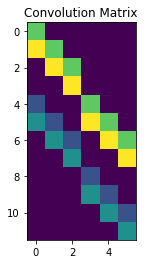

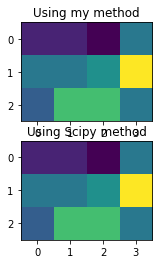

In [123]:

H = np.array([[1,2],[3,4]])
X = np.array([[1,-1,2],[1,1,1]])
N1 = H.shape[0] + X.shape[0] - 1
N2 = H.shape[1] + X.shape[1] - 1


C = lin_conv_2d(H,N1,N2,X.shape[0],X.shape[1]) 

Y1 = reshape_output(C@reshape_input(X),N1,N2)
Y2 = scipy.signal.convolve2d(H,X)

plt.figure()
plt.imshow(C)
plt.title('Convolution Matrix')

fig,axes = plt.subplots(2)
axes[0].imshow(Y1)
axes[0].set_title('Using my method')
axes[1].imshow(Y2)
axes[1].set_title('Using Scipy method')


Text(0.5, 1.0, 'Using Scipy method')

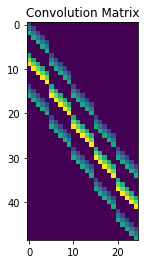

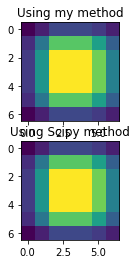

In [124]:

H = np.array([[1,2,3],[3,4,5],[1,2,3]])
X = X = np.ones((5,5))
N1 = H.shape[0] + X.shape[0] - 1
N2 = H.shape[1] + X.shape[1] - 1


C = lin_conv_2d(H,N1,N2,X.shape[0],X.shape[1]) 

plt.figure()
plt.imshow(C)
plt.title('Convolution Matrix')

Y1 = reshape_output(C@reshape_input(X),N1,N2)
Y2 = scipy.signal.convolve2d(H,X)
fig,axes = plt.subplots(2)
axes[0].imshow(Y1)
axes[0].set_title('Using my method')
axes[1].imshow(Y2)
axes[1].set_title('Using Scipy method')

Text(0.5, 1.0, 'Using Scipy method')

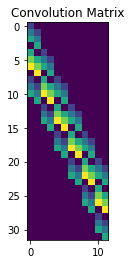

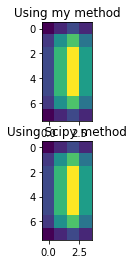

In [125]:

H = np.array([[1,2,3],[3,4,5],[1,2,3]])
X = np.ones((6,2))
N1 = H.shape[0] + X.shape[0] - 1
N2 = H.shape[1] + X.shape[1] - 1


C = lin_conv_2d(H,N1,N2,X.shape[0],X.shape[1]) 

plt.figure()
plt.imshow(C)
plt.title('Convolution Matrix')

Y1 = reshape_output(C@reshape_input(X),N1,N2)
Y2 = scipy.signal.convolve2d(H,X)
fig,axes = plt.subplots(2)
axes[0].imshow(Y1)
axes[0].set_title('Using my method')
axes[1].imshow(Y2)
axes[1].set_title('Using Scipy method')

## Part B

In [49]:
def cconv2(X,H,N1,N2):
  # Pad X and H to the shape N1 by N2
  H = np.pad(H,((0,N1-H.shape[0]),(0,N2-H.shape[1])),constant_values=((0,0),(0,0)))
  X = np.pad(X,((0,N1-X.shape[0]),(0,N2-X.shape[1])),constant_values=((0,0),(0,0)))

  # Perform DFT2 
  fH = np.fft.fft2(H)
  fX = np.fft.fft2(X)
  fY = fH*fX

  # Inverse FFT
  Y = np.fft.ifft2(fY)

  return np.round(np.real(Y)).astype(int)


Text(0.5, 1.0, 'Output Using conv 2d')

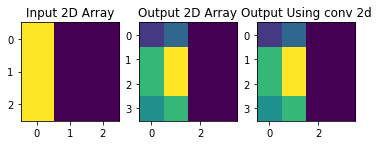

In [50]:
H = np.array([[1,2],[3,4]])
X = np.array([[1,0,0],[1,0,0],[1,0,0]])
Y = cconv2(X,H,4,4)

fig,axes = plt.subplots(1,3)
axes[0].imshow(X)
axes[0].set_title('Input 2D Array')

axes[1].imshow(Y)
axes[1].set_title('Output 2D Array')

Y1 = scipy.signal.convolve2d(H, X)

axes[2].imshow(Y1)
axes[2].set_title('Output Using conv 2d')

## Part C

In [51]:
def cconvmtx2(H,xdim1,xdim2,N1,N2):
  basis_vectors = np.diag(np.ones(xdim1*xdim2))

  C = np.array([cconv2(basis_vectors[:,i].reshape((xdim1,xdim2)),H,N1,N2).reshape(-1) for i in range(xdim1*xdim2)]).T
  return C

Text(0.5, 1.0, 'CCONV matrix')

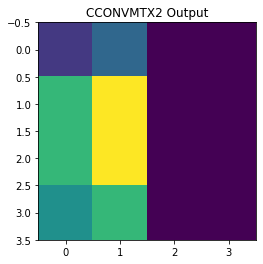

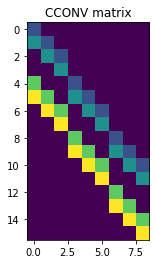

In [52]:
N1 = H.shape[0]+X.shape[0]-1
N2 = H.shape[1]+X.shape[1]-1

C = cconvmtx2(H,X.shape[0],X.shape[1],N1,N2)
x = X.reshape(-1)
Y1 = np.reshape(C@x,(N1,N2))

plt.figure()
plt.imshow(Y1)
plt.title('CCONVMTX2 Output')

plt.figure()
plt.imshow(C)
plt.title('CCONV matrix')

## Part D

In [ ]:
def eval_fft(i,j,N1,N2):
  
  #F = np.array([[math.e**(-1j*2*np.pi*(1/N1*i*k1 + 1/N2*j*k2)) for k2 in range(N2)] for k1 in range(N1)])
  F = np.zeros((N1,N2))
  F[i,j] = 1
  F = np.fft.fft2(F)
  return F.reshape(-1)

def dtfmtx2(N1,N2):
  F = np.array([[eval_fft(i,j,N1,N2)for i in range(N1)] for j in range(N2)])
  F = F.reshape((N1*N2,-1))
  print(F.shape)
  return F
  

(9, 9)


Text(0.5, 1.0, 'Using NP')

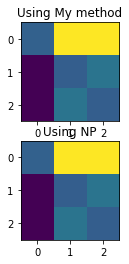

In [ ]:
H = np.array([[2,-9,3],[1,-8,1],[0,0,0]])
N1,N2 = H.shape

F = dtfmtx2(N1,N2)

# Vectorize H
h = H.reshape(-1)
fH1 = (F@h).reshape((N1,N2))

# Real FFT
fH2 = np.fft.fft2(H)

fig,axes = plt.subplots(2)
axes[0].imshow(abs(fH1).T)
axes[0].set_title('Using My method')

axes[1].imshow(abs(fH2))
axes[1].set_title('Using NP')
